In [4]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

In [14]:
df = sns.load_dataset("iris")

In [30]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [32]:
scaler = MinMaxScaler()
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df_scaled = pd.DataFrame(scaler.fit_transform(df[features]), columns=['sepal_length','sepal_width','petal_length','petal_width'])


In [33]:
df_scaled

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


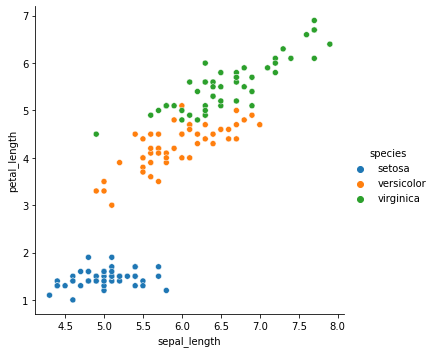

In [35]:
sns.relplot(data=df, x='sepal_length', y='petal_length', hue='species')

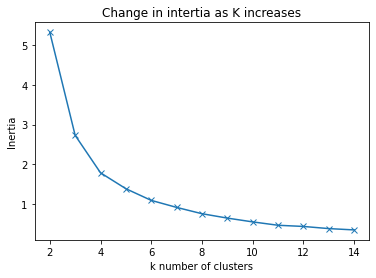

In [39]:
X=df_scaled[['sepal_length', 'petal_length']]
pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2,15)}).plot(marker='x')
plt.ylabel('Inertia')
plt.xlabel('k number of clusters')
plt.title('Change in intertia as K increases')
plt.show()

In [44]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
df['cluster'] = kmeans.predict(X)

In [45]:
df

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,1
148,6.2,3.4,5.4,2.3,virginica,1


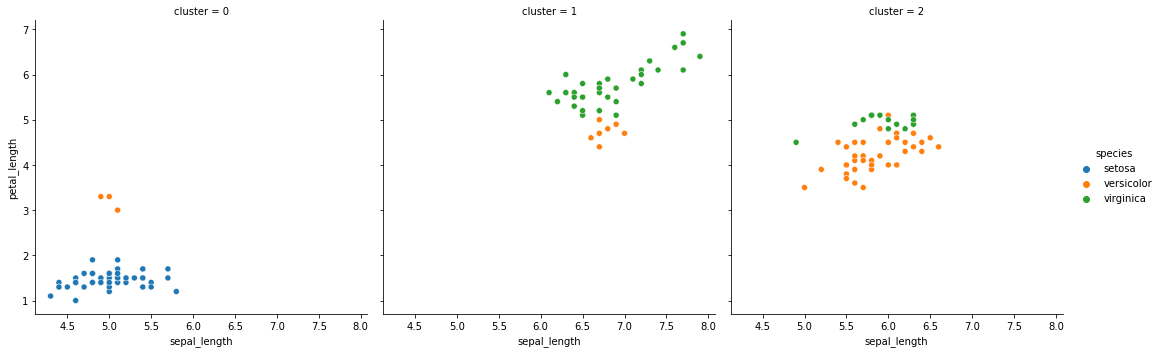

In [46]:
sns.relplot(data=df, x='sepal_length', y='petal_length', hue='species', col='cluster')

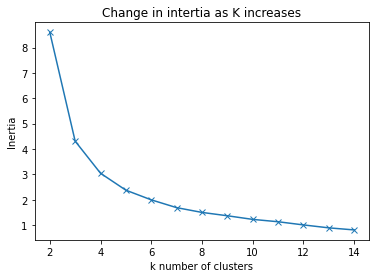

In [47]:
X=df_scaled[['sepal_length', 'petal_length', 'petal_width']]
pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2,15)}).plot(marker='x')
plt.ylabel('Inertia')
plt.xlabel('k number of clusters')
plt.title('Change in intertia as K increases')
plt.show()

In [48]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
df['cluster'] = kmeans.predict(X)

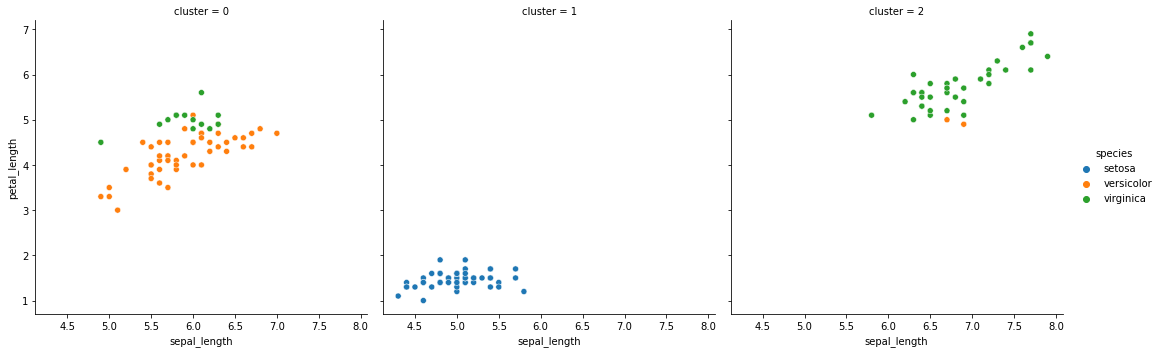

In [49]:
sns.relplot(data=df, x='sepal_length', y='petal_length', hue='species', col='cluster')

# Mall dataset

In [50]:
df = pd.read_csv('https://gist.githubusercontent.com/ryanorsinger/cc276eea59e8295204d1f581c8da509f/raw/2388559aef7a0700eb31e7604351364b16e99653/mall_customers.csv', index_col="customer_id")

In [51]:
df

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [54]:
scaler = MinMaxScaler()
features=['age','annual_income', 'spending_score']
df_scaled = pd.DataFrame(scaler.fit_transform(df[features]), columns=df[features].columns)

In [55]:
df

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [63]:
df_scaled

,age,annual_income,spending_score
0,0.019231,0.000000,0.387755
1,0.057692,0.000000,0.816327
2,0.038462,0.008197,0.051020
3,0.096154,0.008197,0.775510
4,0.250000,0.016393,0.397959
...,...,...,...
195,0.326923,0.860656,0.795918
196,0.519231,0.909836,0.275510
197,0.269231,0.909836,0.744898
198,0.269231,1.000000,0.173469


In [64]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df[features])
kmeans2 = KMeans(n_clusters=5)
kmeans2.fit(df_scaled)

KMeans(n_clusters=5)

In [66]:
df['cluster'] = kmeans.predict(df[features])
df_scaled['cluster'] = kmeans2.predict(df_scaled)

In [68]:
df_scaled

,age,annual_income,spending_score,cluster
0,0.019231,0.000000,0.387755,0
1,0.057692,0.000000,0.816327,2
2,0.038462,0.008197,0.051020,0
3,0.096154,0.008197,0.775510,2
4,0.250000,0.016393,0.397959,0
...,...,...,...,...
195,0.326923,0.860656,0.795918,3
196,0.519231,0.909836,0.275510,4
197,0.269231,0.909836,0.744898,3
198,0.269231,1.000000,0.173469,4


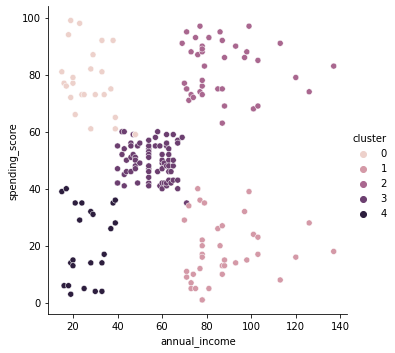

In [69]:
sns.relplot(data=df, x='annual_income', y='spending_score', hue='cluster', title='unscaled clusters')
plt.show()

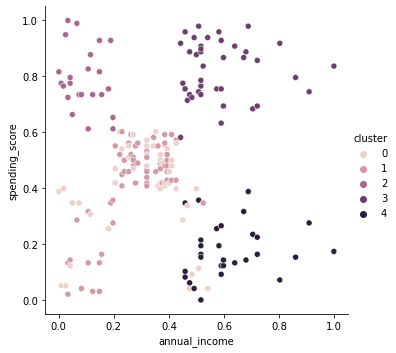

In [72]:
sns.relplot(data=df_scaled, x='annual_income', y='spending_score', hue='cluster')
plt.title=('scaled clusters')
plt.show()

# scaling does effect the clustering